## Matplotlib Pymaceuticals Challenge 

- There is a very high correlation between the mice weight and the tumor volume on the mice. This makes tumor volume prediction very reliable according to the mice weight measurement. 

- We can clearly see how the tumor volume is reduced over time with the Capomulin regimen. Taking into account this is one of the most effective drugs (according to the boxplot), it would be interesting to compare it with the other drug's results.

- For some reason there was a mouse with multiple timepoints and different Tumor Volume values. It is important to make this kind of assessment of our data to avoid getting misreadings ahead in the project. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
merged_df.shape

(1893, 8)

In [2]:
# Checking the number of mice.

total_mice = len(merged_df["Mouse ID"].unique())
print(f"The total number of mice is {total_mice}")

The total number of mice is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_ids_timepoints = merged_df.loc[merged_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
print(f"The Mouse ID(s) that has/have duplicated timepoints is/are {duplicated_ids_timepoints}")

The Mouse ID(s) that has/have duplicated timepoints is/are ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

g989 = merged_df[merged_df["Mouse ID"] == "g989"]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# We are keeping the first occurence on the duplicated data shown above
clean_df = merged_df[merged_df["Mouse ID"] != "g989"]
clean_df.shape

(1880, 8)

In [6]:
# Checking the number of mice in the clean DataFrame.

# The number of mice should be total_mice - 1
total_mice_2 = len(clean_df["Mouse ID"].unique())
print(f"The new total number of mice is {total_mice_2}")

The new total number of mice is 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Creating a group on tumor values by drug regimen
clean_group = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
tumor_mean = clean_group.mean()
tumor_median = clean_group.median()
tumor_variance = clean_group.var()
tumor_std_dev = clean_group.std()
tumor_sem = clean_group.sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_summary_df = pd.DataFrame({"Mean": tumor_mean, 
                                 "Median": tumor_median,
                                 "Variance": tumor_variance,
                                 "Std Dev": tumor_std_dev,
                                 "SEM": tumor_sem})

tumor_summary_df

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice Count')

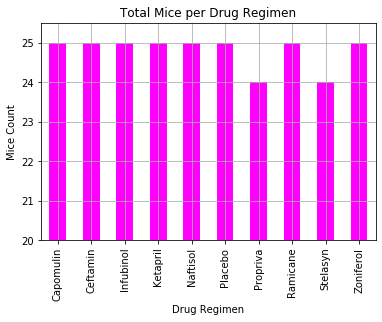

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Counting total number of mice per drug regimen
mice_count = clean_df.groupby(["Drug Regimen"])[["Mouse ID"]].nunique()

# Plotting the bar graph
pandas_bar = mice_count.plot.bar(title = "Total Mice per Drug Regimen", legend = False, color = "magenta", grid = True, ylim = (20, 25.5))
pandas_bar.set_ylabel("Mice Count")

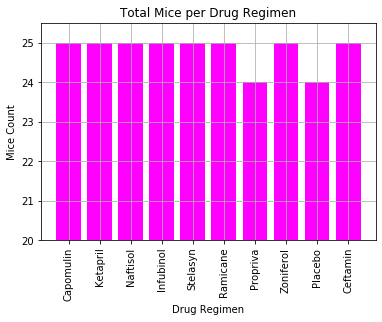

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Creating plot axes
x_axis = merged_df["Drug Regimen"].unique()
y_axis = clean_df.groupby('Drug Regimen')['Mouse ID'].nunique()

# Generating plot
plt.bar(x_axis, y_axis, align = "center", color = "magenta")
plt.xticks(rotation = 90)
plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.ylim(20, 25.5)
plt.grid(True)

plt.show()

Text(0, 0.5, '')

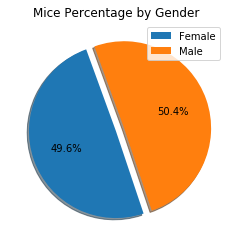

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Counting total number of mice by gender
mice_gender = clean_df.groupby("Sex")["Mouse ID"].nunique()

# Plotting the pie graph
pandas_pie = mice_gender.plot.pie(startangle = 110, title = "Mice Percentage by Gender", autopct = "%1.1f%%", 
                                  legend = True, labels = None, shadow = True, explode = (0, 0.1))
plt.ylabel("")

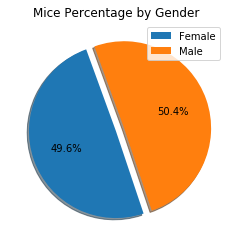

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Setting handles
handles = clean_df["Sex"].unique()

# Generating plot
plt.pie(mice_gender, startangle = 110, autopct = "%1.1f%%", labels = None, shadow = True, explode = (0, 0.1))
plt.title("Mice Percentage by Gender")
plt.legend(handles)

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby("Mouse ID")[["Timepoint"]].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumors_df = pd.merge(last_timepoint, clean_df, on = ["Mouse ID", "Timepoint"])
tumors_df.shape

(248, 8)

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Printing starting information
print("--------------------------------------------------")
print("Most Promissing Treatment Regimens:")
print(treatment_list)

treatment = tumors_df["Drug Regimen"].unique()
treatments = []

for x in treatment: 
    if x in treatment_list:
        treatments.append(x)

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    tumor_treatment = tumors_df.loc[tumors_df["Drug Regimen"] == treatment]
    quartiles = tumor_treatment["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
    upper = quartiles[0.75]
    lower = quartiles[0.25]
    inter = upper - lower
    
    # Printing results
    print("--------------------------------------------------")
    print(f"{treatment}")
    print(f"Tumor Volume Upper Quartile for {treatment}: {round(upper, 2)}")
    print(f"Tumor Volume Interquartile for {treatment}: {round(inter, 2)}")
    print(f"Tumor Volume Lower Quartile for {treatment}: {round(lower, 2)}")

    
    # Calculating potential outliers
    upper_limit = upper + (1.5 * inter)
    lower_limit = lower - (1.5 * inter)
    
    print(f"Values above {round(upper_limit, 2)} mm3 and below {round(lower_limit, 2)} mm3 are potential outliers")

    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_rows = tumors_df.loc[tumors_df["Drug Regimen"].isin(treatments)]
    
    # add subset 
    drug_rows = drug_rows[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
    
    # Determine outliers using upper and lower bounds
    upper_outliers = tumor_treatment["Drug Regimen"][tumor_treatment["Tumor Volume (mm3)"] > upper_limit].count()
    lower_outliers = tumor_treatment["Drug Regimen"][tumor_treatment["Tumor Volume (mm3)"] < lower_limit].count()
    outliers = upper_outliers + lower_outliers
    
    print(f"There are {outliers} outliers")

--------------------------------------------------
Most Promissing Treatment Regimens:
['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
--------------------------------------------------
Infubinol
Tumor Volume Upper Quartile for Infubinol: 65.53
Tumor Volume Interquartile for Infubinol: 11.48
Tumor Volume Lower Quartile for Infubinol: 54.05
Values above 82.74 mm3 and below 36.83 mm3 are potential outliers
There are 1 outliers
--------------------------------------------------
Ceftamin
Tumor Volume Upper Quartile for Ceftamin: 64.3
Tumor Volume Interquartile for Ceftamin: 15.58
Tumor Volume Lower Quartile for Ceftamin: 48.72
Values above 87.67 mm3 and below 25.36 mm3 are potential outliers
There are 0 outliers
--------------------------------------------------
Ramicane
Tumor Volume Upper Quartile for Ramicane: 40.66
Tumor Volume Interquartile for Ramicane: 9.1
Tumor Volume Lower Quartile for Ramicane: 31.56
Values above 54.31 mm3 and below 17.91 mm3 are potential outliers
There are 0 

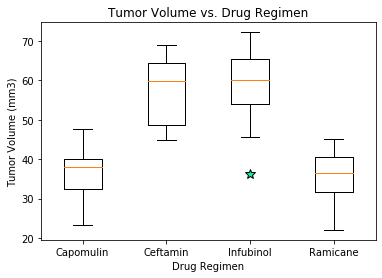

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_volume = drug_rows.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
t_df = pd.DataFrame(tumor_volume)

# Generating plot
green_star = dict(markerfacecolor = "mediumspringgreen", marker = "*", markersize = 10)
plt.boxplot(tumor_volume, labels = tumor_volume.index, flierprops = green_star)
plt.title("Tumor Volume vs. Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

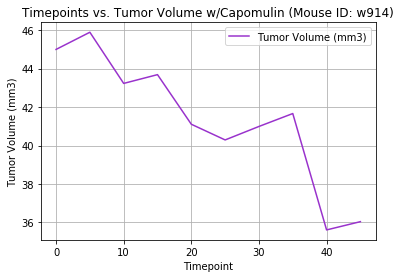

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Looking for a mouse treated with Capomulin 
drug_rows = drug_rows.loc[(drug_rows["Drug Regimen"] == "Capomulin")]

# Generating plot
pandas_line = clean_df.loc[(clean_df["Mouse ID"] == "w914")]
pandas_line.plot(x = "Timepoint", y = "Tumor Volume (mm3)", color = "darkorchid", grid = True)
plt.title("Timepoints vs. Tumor Volume w/Capomulin (Mouse ID: w914)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

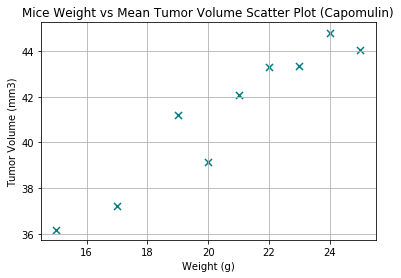

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Selecting capomulin data
capomulin_data = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
scatter_plot = capomulin_data[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_mean = scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

# Creating plot df 
scatter_df = pd.DataFrame(capomulin_mean).reset_index()

# Generating plot 
scatter_df.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", grid = True, marker = "x", s = 50, c = "teal")
plt.title("Mice Weight vs Mean Tumor Volume Scatter Plot (Capomulin)")

plt.show()

## Correlation and Regression

Weight vs. Mean Tumor Volume Correlation is: 0.95


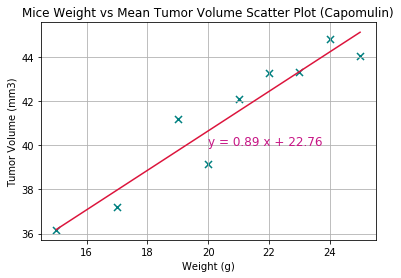

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Setting values to generate regression model
x_axis = scatter_df["Weight (g)"]
y_axis = scatter_df["Tumor Volume (mm3)"]

# Calculating correlation
correlation = st.pearsonr(x_axis, y_axis)
print(f"Weight vs. Mean Tumor Volume Correlation is: {round(correlation[0], 2)}")

# Creating linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

# Generating final plot
scatter_df.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", grid = True, marker = "x", s = 50, c = "teal")
plt.plot(x_axis, regress_values, c = "crimson")
plt.annotate(line_equation, (20, 40), fontsize = 12, color = "mediumvioletred")
plt.title("Mice Weight vs Mean Tumor Volume Scatter Plot (Capomulin)")

plt.show()